In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:/GuviProject/mlproject/notebook/data/hospital_readmissions (1).csv')

In [3]:
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes


In [4]:
df.shape

(1000, 13)

In [5]:
df.isna().sum()

Patient_ID                 0
Age                        0
Gender                     0
Admission_Type             0
Diagnosis                  0
Num_Lab_Procedures         0
Num_Medications            0
Num_Outpatient_Visits      0
Num_Inpatient_Visits       0
Num_Emergency_Visits       0
Num_Diagnoses              0
A1C_Result               434
Readmitted                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             1000 non-null   int64 
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   object
 3   Admission_Type         1000 non-null   object
 4   Diagnosis              1000 non-null   object
 5   Num_Lab_Procedures     1000 non-null   int64 
 6   Num_Medications        1000 non-null   int64 
 7   Num_Outpatient_Visits  1000 non-null   int64 
 8   Num_Inpatient_Visits   1000 non-null   int64 
 9   Num_Emergency_Visits   1000 non-null   int64 
 10  Num_Diagnoses          1000 non-null   int64 
 11  A1C_Result             566 non-null    object
 12  Readmitted             1000 non-null   object
dtypes: int64(8), object(5)
memory usage: 101.7+ KB


In [8]:
df.nunique()

Patient_ID               1000
Age                        68
Gender                      3
Admission_Type              3
Diagnosis                   4
Num_Lab_Procedures         99
Num_Medications            30
Num_Outpatient_Visits       5
Num_Inpatient_Visits        5
Num_Emergency_Visits        5
Num_Diagnoses               9
A1C_Result                  2
Readmitted                  2
dtype: int64

In [9]:
df.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,51.665000,50.836000,15.661000,2.016000,2.019000,1.956000,5.011000
std,288.819436,21.989459,28.075137,8.230177,1.399894,1.416561,1.409983,2.664203
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,34.000000,27.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,500.500000,50.500000,52.000000,16.000000,2.000000,2.000000,2.000000,5.000000
75%,750.250000,69.000000,75.000000,23.000000,3.000000,3.000000,3.000000,7.000000
max,1000.000000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [12]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Admission_Type' variable:  ",end=" ")
print(df['Admission_Type'].unique())

print("Categories in'Diagnosis' variable:",end=" " )
print(df['Diagnosis'].unique())

print("Categories in 'A1C_Result' variable:     ",end=" " )
print(df['A1C_Result'].unique())

print("Categories in 'Readmitted' variable:     ",end=" " )
print(df['Readmitted'].unique())

Categories in 'Gender' variable:      ['Other' 'Female' 'Male']
Categories in 'Admission_Type' variable:   ['Emergency' 'Urgent' 'Elective']
Categories in'Diagnosis' variable: ['Heart Disease' 'Diabetes' 'Injury' 'Infection']
Categories in 'A1C_Result' variable:      [nan 'Normal' 'Abnormal']
Categories in 'Readmitted' variable:      ['Yes' 'No']


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Patient_ID', 'Age', 'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses']

We have 5 categorical features : ['Gender', 'Admission_Type', 'Diagnosis', 'A1C_Result', 'Readmitted']


In [17]:
df['Total_Visits'] = df['Num_Outpatient_Visits'] + df['Num_Inpatient_Visits'] + df['Num_Emergency_Visits']
df['Total_Interactions'] = df['Num_Lab_Procedures'] + df['Num_Medications']
df['Avg_Lab_Procedures_Per_Visit'] = df['Num_Lab_Procedures'] / df['Total_Visits']
df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted,Total_Visits,Total_Interactions,Avg_Lab_Procedures_Per_Visit
0,1,69,Other,Emergency,Heart Disease,33,2,4,1,1,5,NaN,Yes,6,35,5.500000
1,2,32,Female,Urgent,Diabetes,81,10,4,4,1,6,NaN,No,9,91,9.000000
2,3,78,Female,Urgent,Heart Disease,75,29,4,0,3,5,Normal,No,7,104,10.714286
3,4,38,Male,Elective,Diabetes,77,11,2,3,4,9,NaN,Yes,9,88,8.555556
4,5,41,Female,Urgent,Diabetes,50,25,3,4,1,3,NaN,Yes,8,75,6.250000


In [24]:
outpatient_full = df[df['Num_Outpatient_Visits'] <= 50]['Avg_Lab_Procedures_Per_Visit'].count()
inpatient_full = df[df['Num_Inpatient_Visits'] <= 50]['Avg_Lab_Procedures_Per_Visit'].count()
emergency_full = df[df['Num_Emergency_Visits'] <= 50]['Avg_Lab_Procedures_Per_Visit'].count()

print(f'Number of visits as outpatient: {outpatient_full}')
print(f'Number of visits as inpatient: {inpatient_full}')
print(f'Number of visits as emergency: {emergency_full}')

Number of visits as outpatient: 1000
Number of visits as inpatient: 1000
Number of visits as emergency: 1000


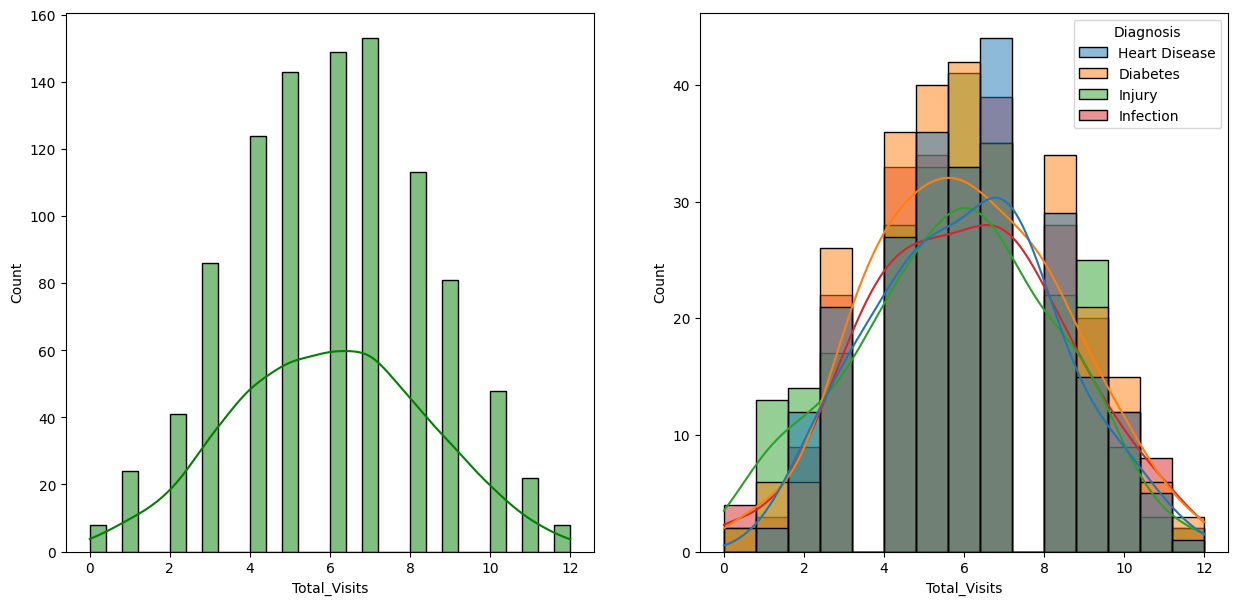

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_Visits',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_Visits',kde=True,hue='Diagnosis')
plt.show()